In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io

C:\Users\Reasat\Miniconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Reasat\Miniconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Reasat\Miniconda3\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
def imshow_group(X,y=None,y_pred_1=None,y_pred_2=None,y_pred_3=None,
                 n_per_row=5,FIG_WIDTH=15,ROW_HEIGHT=4,fontsize_caption=12):
    '''helper function to visualize a group of images along with their categorical true labels (y) and prediction probabilities.
    Args:
        X: images
        y: categorical true labels
        y_pred: predicted class probabilities
        n_per_row: number of images per row to be plotted
    '''
    n_sample=len(X)
    img_dim=X[0].shape[1]
    j=np.ceil(n_sample/n_per_row)
    plt.figure(figsize=(FIG_WIDTH,ROW_HEIGHT*j))
    for i,img in enumerate(X):
        ax=plt.subplot(j,n_per_row,i+1)
        plt.imshow(img)
        if y is not None:
            plt.title('true label: {}'.format(np.argmax(y[i])))
        if y_pred_1 is not None:
            top_n=len(y_pred_1[i][0]) # top 3 predictions with highest probabilities
#             print(top_n)
            x_off=0.1
            y_off=-0.4
            for k in range(top_n):
#                 print(y_pred_1[i][0][k],round(y_pred_1[i][k][1],2))
                string='{} {:.2f}%\n'.format(y_pred_1[i][0][k],(y_pred_1[i][1][k]*100))
#                 print(y_pred_1[i][0][k])
#                 string='{}\n'.format(y_pred_1[i][0][k])
                ax.text(x_off, y_off, string, horizontalalignment='center',
                         verticalalignment='center',fontproperties=prop,
                        transform=ax.transAxes,fontsize=fontsize_caption)
                y_off+=-0.2
        if y_pred_2 is not None:
            top_n=len(y_pred_2[i][0]) # top 3 predictions with highest probabilities
#             print(top_n)
            x_off=0.5
            y_off=-0.4
            for k in range(top_n):
#                 print(y_pred_2[i][0][k],round(y_pred_2[i][k][1],2))
                string='{} {:.2f}%\n'.format(y_pred_2[i][0][k],(y_pred_2[i][1][k]*100))
#                 print(y_pred_2[i][0][k])
#                 string='{}\n'.format(y_pred_2[i][0][k])
                ax.text(x_off, y_off, string, horizontalalignment='center',
                         verticalalignment='center',fontproperties=prop,
                        transform=ax.transAxes,fontsize=fontsize_caption)
                y_off+=-0.2
        
        if y_pred_3 is not None:
            top_n=len(y_pred_3[i][0]) # top 3 predictions with highest probabilities
#             print(top_n)
            x_off=0.9
            y_off=-0.4
            for k in range(top_n):
#                 print(y_pred_3[i][0][k],round(y_pred_3[i][k][1],2))
                string='{} {:.2f}%\n'.format(y_pred_3[i][0][k],(y_pred_3[i][1][k]*100))
#                 print(y_pred_3[i][0][k])
#                 string='{}\n'.format(y_pred_3[i][0][k])
                ax.text(x_off, y_off, string, horizontalalignment='center',
                         verticalalignment='center',fontproperties=prop,
                        transform=ax.transAxes,fontsize=fontsize_caption)
                y_off+=-0.2
        
    plt.show()

In [35]:
dir_data = r'D:\Data\cs-8395-dl\assignment2_data'
dir_data_train = os.path.join(dir_data,'train')
dir_data_test = os.path.join(dir_data,'test')

In [5]:
path_label_train = r'D:\Data\cs-8395-dl\assignment2_data\labels\Train_labels.csv'
path_label_test = r'D:\Data\cs-8395-dl\assignment2_data\labels\Test_labels.csv'

In [12]:
df_train = pd.read_csv(path_label_train)
print(df_train.shape)
df_train.set_index('image',inplace=True)
df_train.head()

(9015, 8)


MEL  NV  BCC  AKIEC  BKL  DF  VASC
image                                           
ISIC_0024306    0   1    0      0    0   0     0
ISIC_0024307    0   1    0      0    0   0     0
ISIC_0024308    0   1    0      0    0   0     0
ISIC_0024309    0   1    0      0    0   0     0
ISIC_0024310    1   0    0      0    0   0     0

In [13]:
df_test = pd.read_csv(path_label_test)
print(df_test.shape)
df_test.set_index('image',inplace=True)
df_test.head()

(1000, 8)


MEL  NV  BCC  AKIEC  BKL  DF  VASC
image                                           
ISIC_0033321    0   0    0      0    1   0     0
ISIC_0033322    0   0    0      0    1   0     0
ISIC_0033323    1   0    0      0    0   0     0
ISIC_0033324    1   0    0      0    0   0     0
ISIC_0033325    1   0    0      0    0   0     0

In [16]:
for col in df_train.columns:
    count = df_train[col].sum()
    prcntg = count/df_train.shape[0]
    print('{}, count: {}, {:.2f}%'.format(col,count,prcntg))

MEL, count: 887, 0.10%
NV, count: 6130, 0.68%
BCC, count: 480, 0.05%
AKIEC, count: 317, 0.04%
BKL, count: 972, 0.11%
DF, count: 101, 0.01%
VASC, count: 128, 0.01%


In [17]:
for col in df_test.columns:
    count = df_test[col].sum()
    prcntg = count/df_test.shape[0]
    print('{}, count: {}, {:.2f}%'.format(col,count,prcntg))

MEL, count: 226, 0.23%
NV, count: 575, 0.57%
BCC, count: 34, 0.03%
AKIEC, count: 10, 0.01%
BKL, count: 127, 0.13%
DF, count: 14, 0.01%
VASC, count: 14, 0.01%


MEL


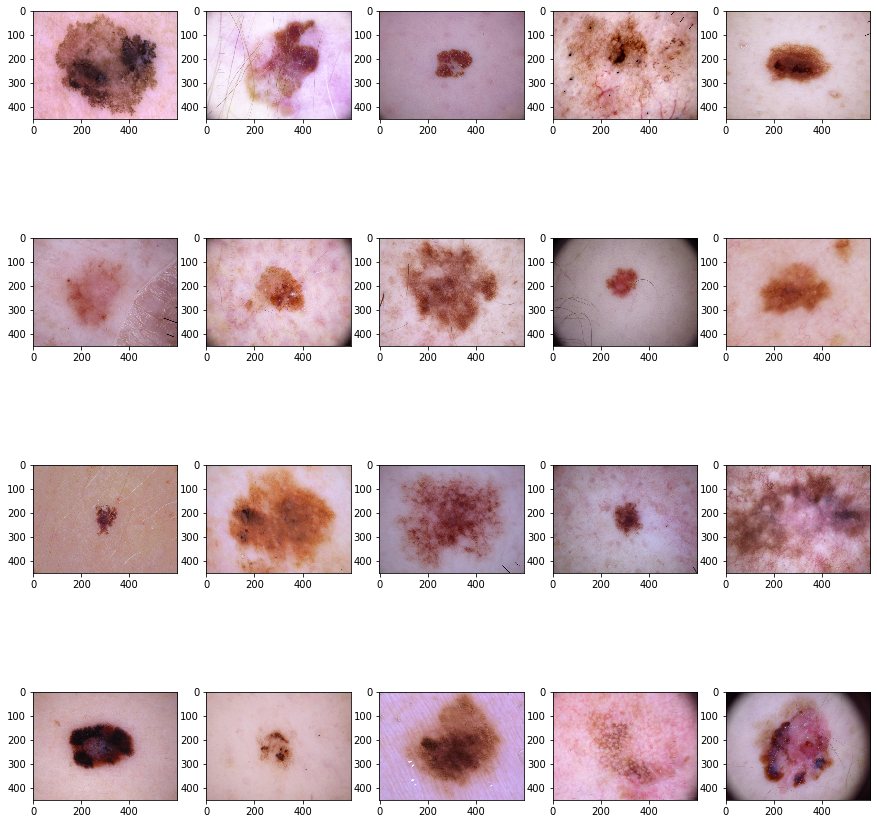

NV


BCC


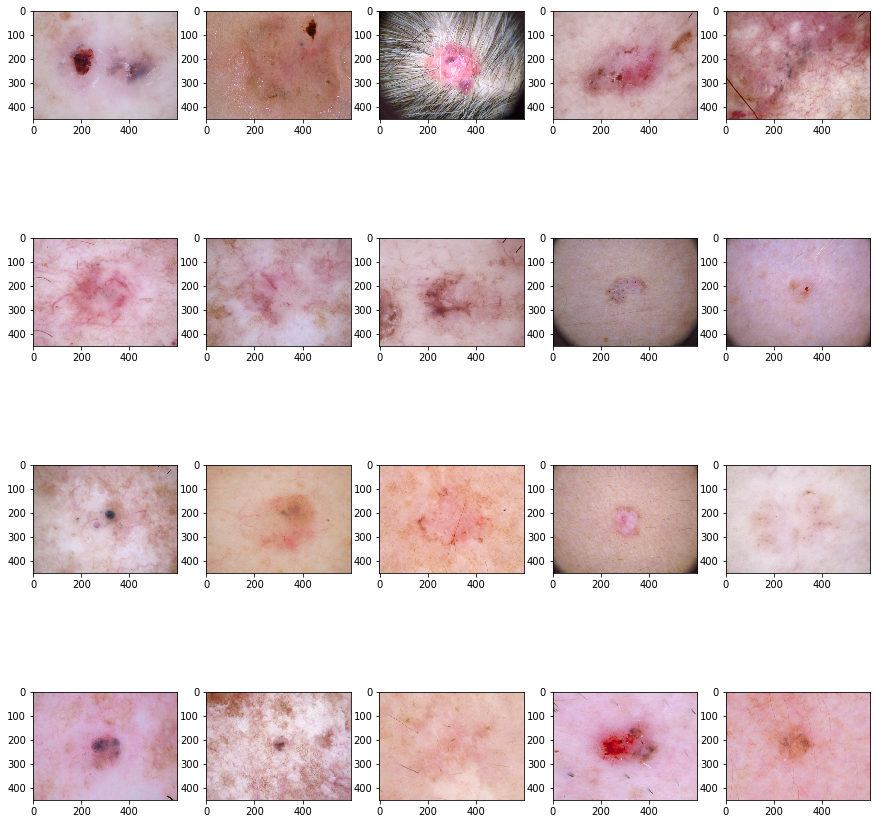

AKIEC


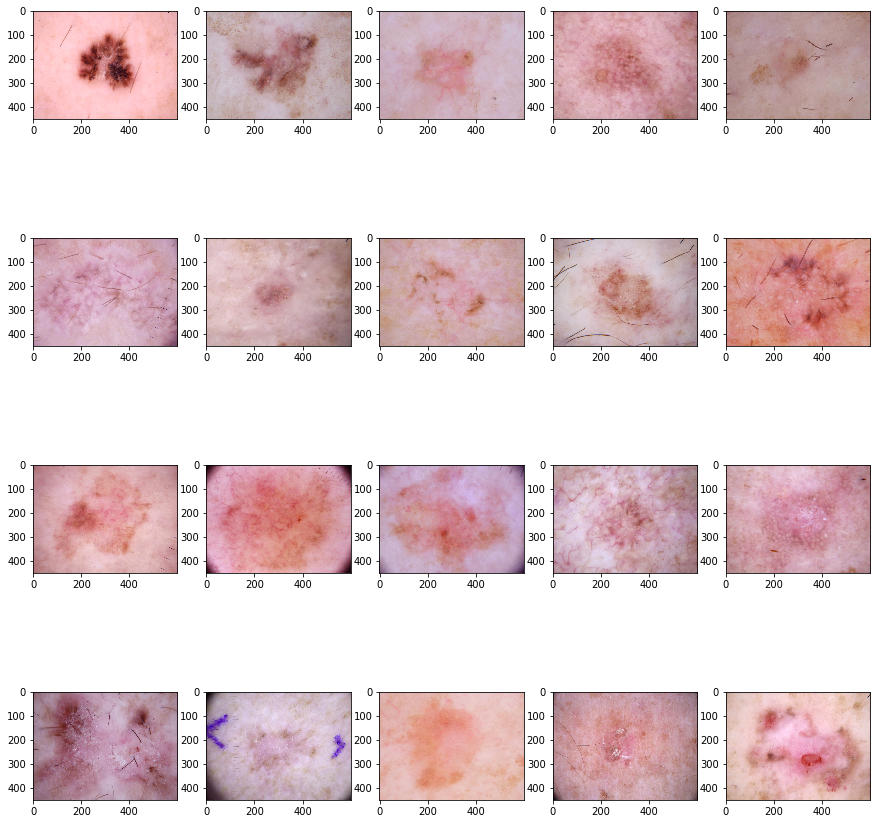

BKL


DF


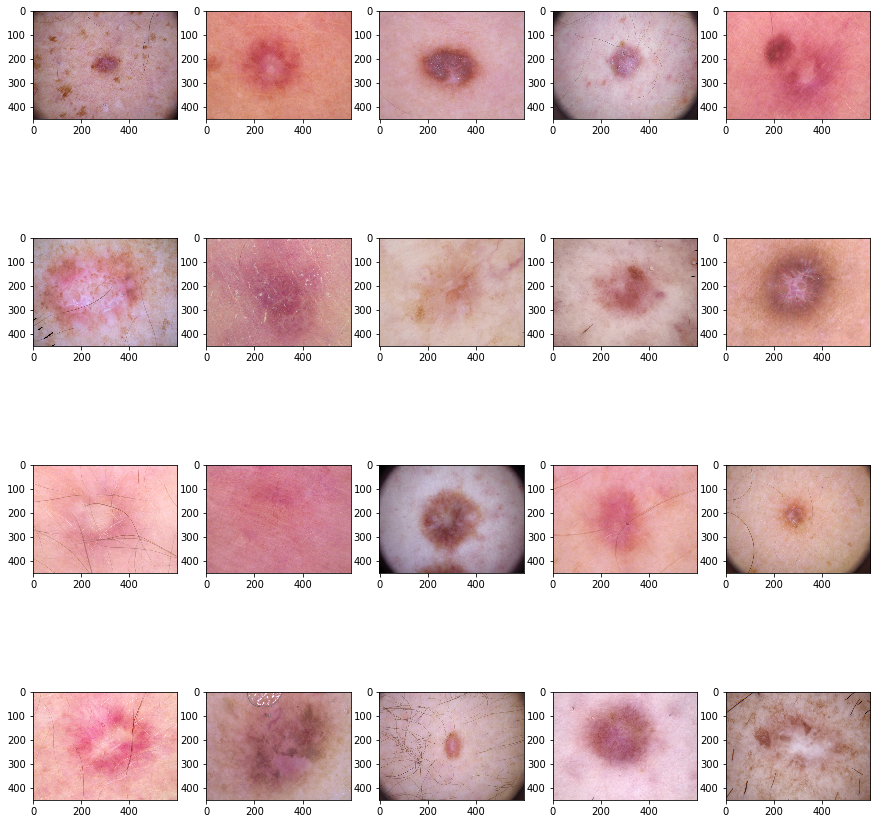

VASC


In [33]:
for col in df_train.columns:
    print(col)
    indice=df_train.groupby(col).get_group(1).index.values
    np.random.seed(42)
    img_all=[]
    for ind in np.random.choice(indice,size=20,replace=False):
        path=os.path.join(dir_data_train,ind+'.jpg')
        img=io.imread(path)
        img_all.append(img)
    imshow_group(img_all)

MEL


NV


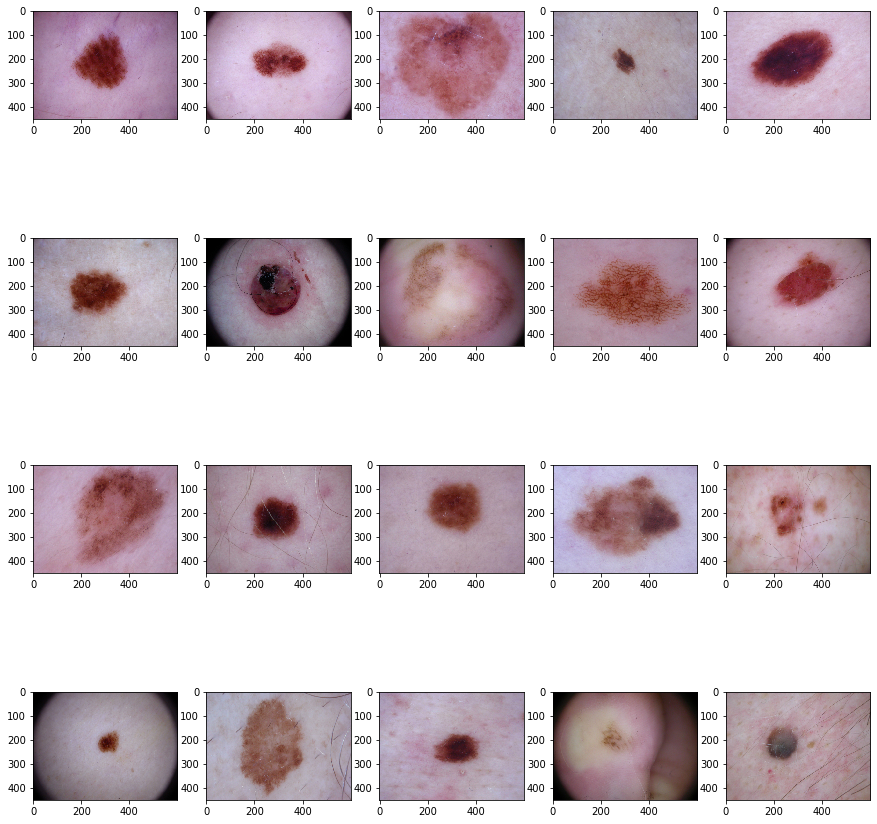

BCC


AKIEC


ValueError: Cannot take a larger sample than population when 'replace=False'

In [36]:
for col in df_test.columns:
    print(col)
    indice=df_test.groupby(col).get_group(1).index.values
    np.random.seed(42)
    img_all=[]
    for ind in np.random.choice(indice,size=20,replace=False):
        path=os.path.join(dir_data_test,ind+'.jpg')
        img=io.imread(path)
        img_all.append(img)
    imshow_group(img_all)